[0, 2, 3, 4, 5, 6, 7, 8]


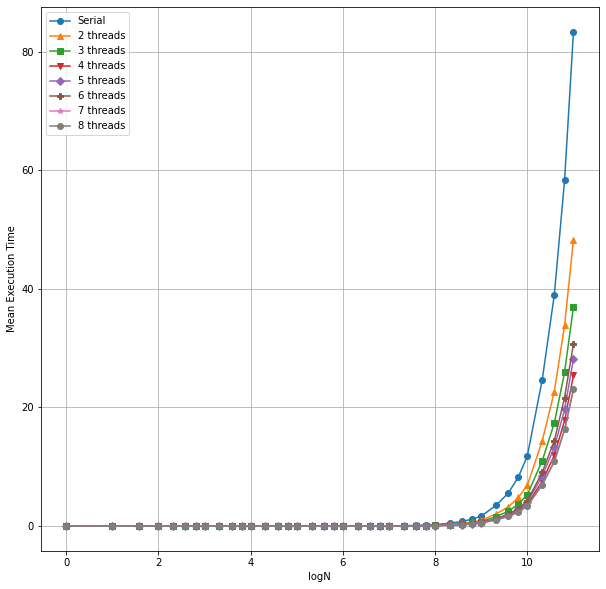

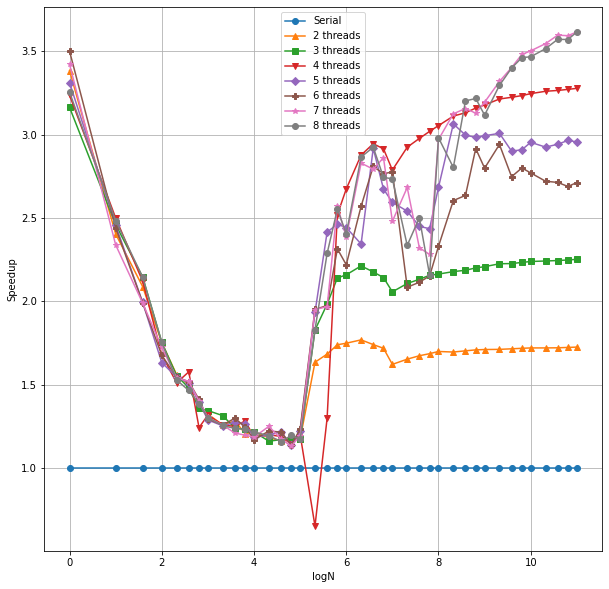

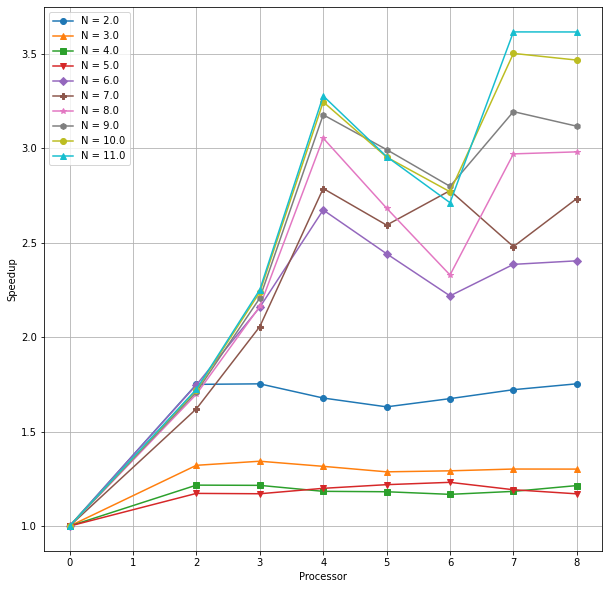

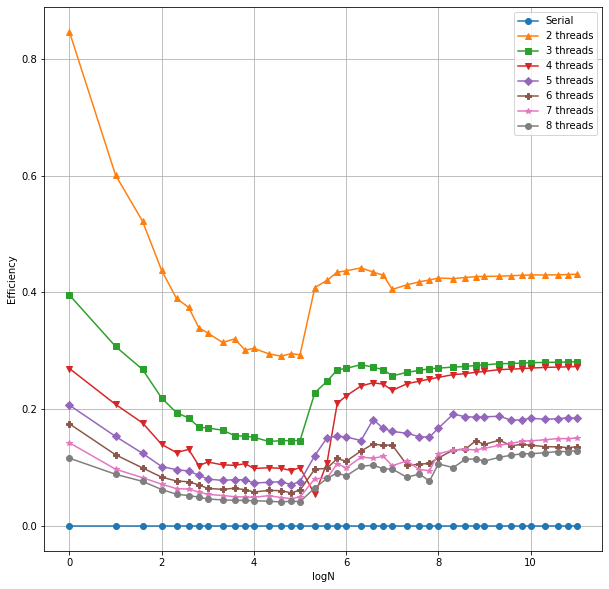

In [10]:
import matplotlib.pyplot as plt
import math
import numpy as np

runs = 3
procs = 8 #0, 2, 4, 6, 8
prob =  40 #2^0 to 2^12
problem_size = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 20, 24, 28, 32, 40, 48, 56, 64, 80, 96, 112, 128, 160, 192, 224, 256, 320, 384, 448, 512, 640, 768, 896, 1024, 1280, 1536, 1792, 2048]
processor_size = [0, 2, 3, 4, 5, 6, 7, 8]
print(processor_size)
alg_time = [[0. for i in range(prob)] for j in range(procs)]
e2e_time = [[0. for i in range(prob)] for j in range(procs)]
speedup = [[0. for i in range(prob)] for j in range(procs)]
efficiency = [[0. for i in range(prob)] for j in range(procs)]

# file format : problem_size, processor, run_id, alg_time, e2e_time
with open('data.txt','r') as file:
    lines = file.readlines()
    for line in lines:
        words = map(float,line.split(','))
        words = list(words)
        #change the below line according to problem size
        words[0] = problem_size.index(words[0])
        words[1] = processor_size.index(words[1])
        #print(words[1])
        alg_time[words[1]][words[0]] += words[3]
        e2e_time[words[1]][words[0]] += words[4]

#print(alg_time)
for i in range(procs):
    for j in range(prob):
        alg_time[i][j] = alg_time[i][j]/runs
#print(alg_time)
for i in range(procs):
    for j in range(prob):
        speedup[i][j] = alg_time[0][j]/alg_time[i][j]
        if i!=0:
            efficiency[i][j] = speedup[i][j]/(4*i)

# column values of speedup (for diffrent size with ith processor)
colSpeedup = list(zip(*speedup))

#Log Scale
problem_size = [math.log2(i) for i in problem_size]

marker = iter(['o', '^', 's', 'v', 'D', 'P', '*','o', '^', 's', 'v', 'D', 'P', '*', 'h'])
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
plt.grid()
plt.xlabel('logN')
plt.ylabel('Mean Execution Time')
for i in range(procs):
    if(i == 0):
        plt.plot(problem_size,alg_time[i],label='Serial',marker = next(marker))
    else:
        plt.plot(problem_size,alg_time[i],label=str(processor_size[i])+' threads',marker = next(marker))
    plt.legend()
#plt.savefig("a.png")

marker = iter(['o', '^', 's', 'v', 'D', 'P', '*','o', '^', 's', 'v', 'D', 'P', '*', 'h'])
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
plt.grid()
plt.xlabel('logN')
plt.ylabel('Speedup')
for i in range(procs):
    if(i == 0):
        plt.plot(problem_size,speedup[i],label='Serial',marker = next(marker))
    else:
        plt.plot(problem_size,speedup[i],label=str(processor_size[i])+' threads',marker = next(marker))
    plt.legend()
#plt.savefig("b.png")

marker = iter(['o', '^', 's', 'v', 'D', 'P', '*', 'h','o', '^', 's', 'v', 'D', 'P', '*', 'h','o', '^', 's', 'v', 'D', 'P', '*', 'h','o', '^', 's', 'v', 'D', 'P', '*', 'h','o', '^', 's', 'v', 'D', 'P', '*', 'h','o', '^', 's', 'v', 'D', 'P', '*', 'h'])
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
plt.grid()
plt.xlabel('Processor')
plt.ylabel('Speedup')
for i in range(prob):
    if (i+1)%4 == 0:
        plt.plot(processor_size,list(colSpeedup[i]),label='N = ' + str(problem_size[i]),marker = next(marker))
        plt.legend()
#plt.savefig("c.png")

marker = iter(['o', '^', 's', 'v', 'D', 'P', '*','o', '^', 's', 'v', 'D', 'P', '*', 'h'])
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(10)
plt.grid()
plt.xlabel('logN')
plt.ylabel('Efficiency')
for i in range(procs):
    if(i == 0):
        plt.plot(problem_size,efficiency[i],label='Serial',marker = next(marker))
    else:
        plt.plot(problem_size,efficiency[i],label=str(processor_size[i])+' threads',marker = next(marker))
    plt.legend()
#plt.savefig("d.png")
